# 1) Obtaining data and loading libraries

In [95]:
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

df=pd.read_csv('kc_house_data.csv')

#Inital look at df
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [96]:
#Initial observations
    #df has 21597 rows and 21 colums with various data types
    #columns waterfront, view and yr_renovated have missing values

# 2) Data cleaning + Data Exploration

## Dealing with missing values

In [97]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [98]:
#columns waterfront, view and yr_renovated have missing values

#YR_RENOVATED
print(df.yr_renovated.value_counts().head())

# 17011 entries have the value of '0', which seems to be a placeholder for the fact the house has never been renovated
# there are 3842 NaNs - I will change these into 'not renovated', as that is the overwhelming value
# I will later make this columns categorical and bin the values

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64


In [99]:
df.yr_renovated = df.yr_renovated.astype('str')
df.loc[df.yr_renovated == '0.0','yr_renovated'] = 'not renovated'
df.loc[df.yr_renovated == 'nan','yr_renovated'] = 'not renovated'

In [100]:
print(df.yr_renovated.isna().sum())

0


In [101]:
#VIEW
# this columns has 63 NaNs
# the overwhelming value in this column is 0 (19 422 out of 21 597)
# I will turn the missing values into '0'
# I will later make this columns categorical 

df.view.value_counts()
df.view = df.view.fillna(0.0)

In [102]:
#WATERFRONT
# overwhelming value: 0.0 (19075)
# NaNs = 2376
#For the sake of simplicty, I will drop this columns entirely as it will not provide much insight.
df = df.drop('waterfront',axis=1)

#While on it, I will also delete the date column, as we will not need that data
df = df.drop('date',axis=1)
#Now we have no obviuous missing values!
df.isna().sum()


id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Looking for placeholders

In [103]:
#checking for placeholders in individual columns
#I will later use scatter plots to check for other unusual values and outliers

for var in list(df.columns):
    print (df[var].value_counts())

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
3969300030    2
2560801222    2
3883800011    2
2228900270    2
251300110     2
5282200015    2
2787460720    2
5536100020    2
2568300045    2
8648900110    2
8910500150    2
2044500213    2
4222310010    2
8651402750    2
8820903380    2
4345000510    2
641900050     2
1823049202    2
8121100395    2
6308000010    2
1139600270    2
937000330     2
3293700496    2
4435000705    2
5430300171    2
             ..
9454200030    1
8857640710    1
7519001825    1
3992700130    1
7515000035    1
5608010980    1
475000510     1
4038300010    1
2770603522    1
2738640470    1
9238480020    1
9492500170    1
2607740100    1
880000189     1
7974200510    1
6815100095    1
2617300160    1
2768100545    1
3324069058    1
1931300035    1
1922000070    1
8165500110    1
7893808220    1
3333002440    1
3420069065    1
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420,

Name: lat, Length: 5033, dtype: int64
-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
-122.363     99
-122.288     98
-122.357     96
-122.284     95
-122.172     94
-122.365     94
-122.306     93
-122.346     93
-122.351     92
-122.304     92
-122.348     92
-122.299     92
-122.375     92
-122.295     91
-122.350     90
-122.285     90
-122.292     90
-122.352     89
-122.289     89
-122.298     88
-122.359     88
-122.384     87
-122.317     86
-122.316     86
-122.301     86
           ... 
-122.454      1
-121.835      1
-122.519      1
-122.469      1
-121.788      1
-121.891      1
-121.325      1
-122.447      1
-121.760      1
-122.514      1
-121.725      1
-121.716      1
-121.803      1
-122.499      1
-121.792      1
-122.512      1
-121.815      1
-121.359      1
-121.733      1
-121.711      1
-121.767      1
-121.480      1
-121.701      1
-122.479      1
-122.467      1
-121.403      1
-121.804      1
-121.726      1
-121.895      1
-1

In [104]:
#sqft_basement
# There are 454 '?' values in this dataset. That is a relatively small amount.
#I will first replace '?' with Nan
df.sqft_basement = df.sqft_basement.replace('?',np.nan)

#Now I will turn the columns into float and then replace the missing value with the median - which is 0!
df.sqft_basement = df.sqft_basement.astype('float64')
df.sqft_basement = df.sqft_basement.fillna(df.sqft_basement.median())

#I will make this column categorical and turn '0' into a category of "no basement"

In [105]:
df.sqft_basement.describe()

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

## Checking columns types

In [106]:
#CHECKING COLUMN TYPES 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null object
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11), object(1)
memory usage: 3.1+ MB


In [107]:
# I will turn column zipcode into categories as they are categorical variables
df.zipcode = df.zipcode.astype('category')

#I will turn View into integer
df.view = df.view.astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null object
zipcode          21597 non-null category
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: category(1), float64(6), int64(11), object(1)
memory usage: 3.0+ MB


## Initial Data Exploration

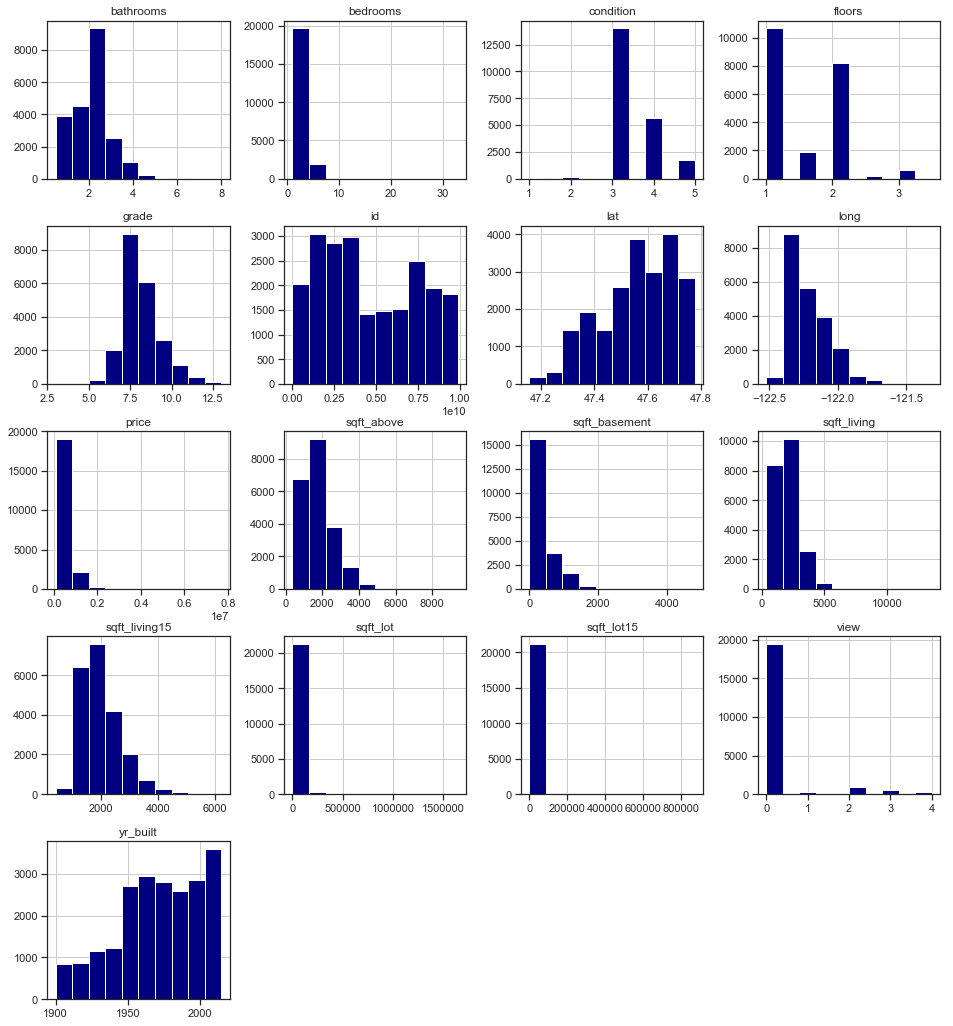

In [108]:
#QUICK VISUALISATIONS
df.hist(figsize=(16,18),color='navy');
# columns such as bedrooms, price, sqft_lot, sqft_above, sqft_basement and sqft_lot15 seem to have some outliers
# columns condition, floors, grade, bathrooms, view and bathrooms look like categorical variables


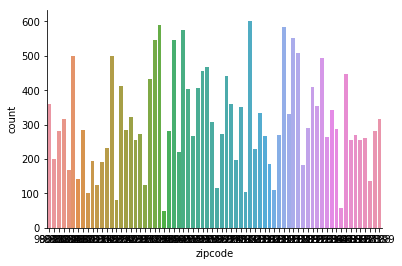

In [15]:
#How are properties distributed across zipcodes?
sns.countplot(df['zipcode'])
sns.despine();
#properties in zipocdes are not evenly distributed, but that was expected
#no zipcode category contains more than 600 houses

## Removing Outliers 

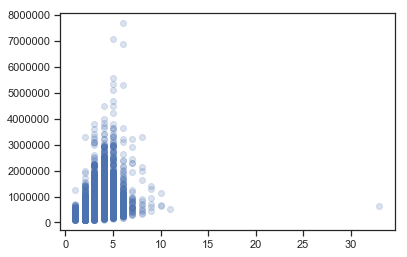

In [110]:
# after a quick look at different scatterplots, I have identified some outliers
plt.scatter(df.bedrooms,df.price, alpha = 0.2)
plt.show()

In [111]:
#looking for outliers
df.describe()
#there is a house with 33 bedrooms
#let's have a look at it
df.loc[df.bedrooms > 15] 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,640000.0,33,1.75,1620,6000,1.0,0,5,7,1040,580.0,1947,not renovated,98103,47.6878,-122.331,1330,4700


In [112]:
#I will remove this house from the dataset
df = df.drop([15856])

In [113]:
#also, there are 7 houses sold for more than $5 000 000
#let's have a look at them
df.loc[df.price > 5000000]
#as we can see, there are only two houses in that category, which are skewing our dataset
#median price: $450 000
#mean price: $540 296

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1162,1247600105,5110000.0,5,5.25,8010,45517,2.0,4,3,12,5990,2020.0,1999,not renovated,98033,47.6767,-122.211,3430,26788
1313,7558700030,5300000.0,6,6.00,7390,24829,2.0,0,4,12,5000,2390.0,1991,not renovated,98040,47.5631,-122.210,4320,24619
1446,8907500070,5350000.0,5,5.00,8000,23985,2.0,4,3,12,6720,1280.0,2009,not renovated,98004,47.6232,-122.220,4600,21750
3910,9808700762,7060000.0,5,4.50,10040,37325,2.0,2,3,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
4407,2470100110,5570000.0,5,5.75,9200,35069,2.0,0,3,13,6200,3000.0,2001,not renovated,98039,47.6289,-122.233,3560,24345
7245,6762700020,7700000.0,6,8.00,12050,27600,2.5,3,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
9245,9208900037,6890000.0,6,7.75,9890,31374,2.0,4,3,13,8860,1030.0,2001,not renovated,98039,47.6305,-122.240,4540,42730


In [114]:
#I will drop these houses from the dataset
df = df.drop([3910])
df = df.drop([7245])
df = df.drop([9245])

In [115]:
#dropping houses above $5 mil
df = df.drop([1162])
df = df.drop([1313])
df = df.drop([1446])
df = df.drop([4407])

In [116]:
#Outliers in sqft_living
df.loc[df.sqft_living > 8000]
#There are only 4 properties with sgft_living value above 8000 sqft
#The value of the largest property is $2,280,000
#I will remove this property from the dataset


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8085,1924059029,4670000.0,5,6.75,9640,13068,1.0,4,3,12,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
12764,1225069038,2280000.0,7,8.00,13540,307752,3.0,4,3,12,9410,4130.0,1999,not renovated,98053,47.6675,-121.986,4850,217800
14542,2303900035,2890000.0,5,6.25,8670,64033,2.0,4,3,13,6120,2550.0,1965,not renovated,98177,47.7295,-122.372,4140,81021
18288,6072800246,3300000.0,5,6.25,8020,21738,2.0,0,3,11,8020,0.0,2001,not renovated,98006,47.5675,-122.189,4160,18969


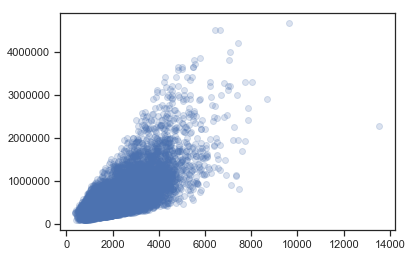

In [117]:
plt.scatter(df.sqft_living,df.price, alpha = 0.2)
plt.show()

In [118]:
df = df.drop([12764])
df = df.drop([8085])
df = df.drop([18288])
df = df.drop([14542])

In [119]:
#Basement
df.loc[df.sqft_basement > 3000]
# there are only 2 properties with basement larget than 3000 sqft
# I will remove them from the dataset

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10074,7767000060,1900000.0,5,4.25,6510,16471,2.0,3,4,11,3250,3260.0,1980,not renovated,98040,47.5758,-122.242,4480,16471
15468,624069108,3200000.0,4,3.25,7000,28206,1.0,4,4,12,3500,3500.0,1991,not renovated,98075,47.5928,-122.086,4913,14663


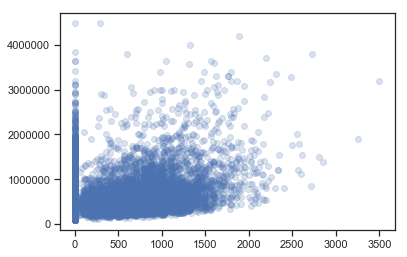

In [120]:
plt.scatter(df.sqft_basement,df.price, alpha = 0.2)
plt.show()

In [121]:
df = df.drop([10074])
df = df.drop([15468])

In [122]:
#sqft_lot
#there are only 4 properties with lots larget than 1 000 000 sqft
df.loc[df.sqft_lot > 1000000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1717,1020069017,700000.0,4,1.00,1300,1651359,1.0,3,4,6,1300,0.0,1920,not renovated,98022,47.2313,-122.023,2560,425581
7640,2623069031,542500.0,5,3.25,3010,1074218,1.5,0,5,8,2010,1000.0,1931,not renovated,98027,47.4564,-122.004,2450,68825
7762,2323089009,855000.0,4,3.50,4030,1024068,2.0,0,3,10,4030,0.0,2006,not renovated,98045,47.4619,-121.744,1830,11700
17305,3326079016,190000.0,2,1.00,710,1164794,1.0,0,2,5,710,0.0,1915,not renovated,98014,47.6888,-121.909,1680,16730


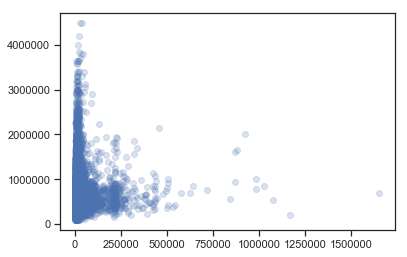

In [123]:
plt.scatter(df.sqft_lot,df.price, alpha = 0.2)
plt.show()

In [124]:
df = df.drop([1717])
df = df.drop([7640])
df = df.drop([7762])
df = df.drop([17305])

In [125]:
# there are only 3 properties with lot15 larger than 500 000 sqft
df.loc[df.sqft_lot15 > 500000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9705,225079036,937500.0,4,4.0,5545,871200,2.0,0,3,11,3605,1940.0,2003,not renovated,98014,47.6760,-121.882,3420,871200
13451,3420069060,790000.0,3,2.5,2640,432036,1.5,3,3,10,2640,0.0,1996,not renovated,98022,47.1795,-122.036,1500,560617
20436,1125079111,1600000.0,4,5.5,6530,871200,2.0,2,3,11,6530,0.0,2008,not renovated,98014,47.6640,-121.878,1280,858132


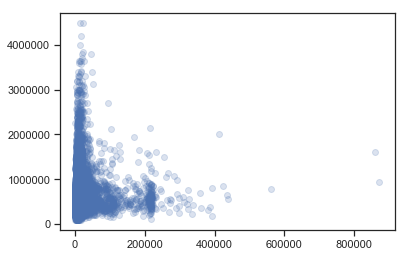

In [126]:
plt.scatter(df.sqft_lot15,df.price, alpha = 0.2)
plt.show()

In [127]:
df = df.drop([9705])
df = df.drop([13451])
df = df.drop([20436])

In [148]:
#What is the 'usual' number of bedrooms and bathrooms?
df_bed = df.loc[df['bedrooms']<8

sns.set(style="white")
sns.countplot(df_bed['bedrooms'])
sns.despine()



SyntaxError: invalid syntax (<ipython-input-148-8b8c426b1f09>, line 4)

In [150]:
df_bath = df.loc[df['bathrooms']<8
sns.set(style="white")
sns.countplot(df_bath['bathrooms'])
sns.despine()

SyntaxError: invalid syntax (<ipython-input-150-a7f58f1abebe>, line 2)

## Multicollinearity

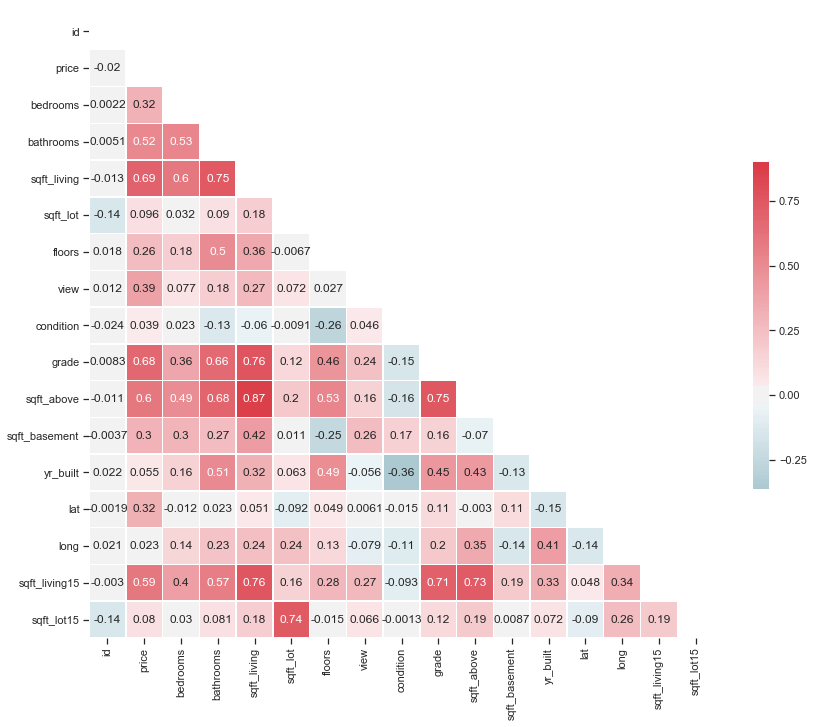

In [34]:
# checking for MULTICOLLINEARITY


sns.set(style="ticks")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(14, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, annot=True,cbar_kws={"shrink": .5});

In [35]:
# columns 'sqft_living' and 'sqft_above' have correlation of 0.87
# looking at the 5 point statistics, their values seems to be roughly similar, they indeed look they describe the same
print(df.sqft_living.describe())
print(df.sqft_above.describe())

count    21576.000000
mean      2075.702911
std        900.106965
min        370.000000
25%       1426.500000
50%       1910.000000
75%       2550.000000
max       7880.000000
Name: sqft_living, dtype: float64
count    21576.000000
mean      1785.424592
std        817.852595
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       7880.000000
Name: sqft_above, dtype: float64


In [36]:
# I will therefore drop the 'sqft_above' column
df = df.drop('sqft_above',axis=1)

# I will also drop the ID column
df = df.drop('id',axis=1)

## Transforming numerical variables

In [37]:
#Log transforming data

#df.sqft_living = np.log(df.sqft_living)
#df.sqft_lot = np.log(df.sqft_lot)

#df.sqft_living15 = np.log(df.sqft_living15)
#df.sqft_lot15 = np.log(df.sqft_lot15)

In [38]:
#Standardisation/Normalisation

#df.sqft_living = (df.sqft_living - df.sqft_living.mean()) / df.sqft_living.std()
#df.sqft_lot = (df.sqft_lot - df.sqft_lot.mean()) / df.sqft_lot.std()

#df.sqft_lot15 = (df.sqft_lot15 - df.sqft_lot15.mean()) / df.sqft_lot15.std()
#df.sqft_living15 = (df.sqft_living15 - df.sqft_living15.mean()) / df.sqft_living15.std()

In [39]:
#Log-transforming target variable
df.price = np.log(df.price)


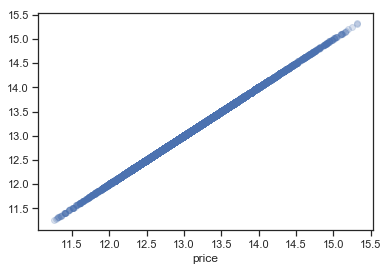

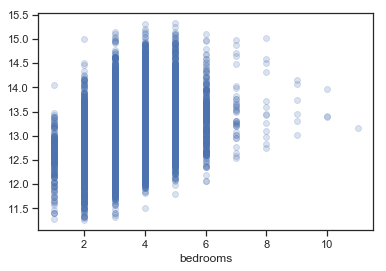

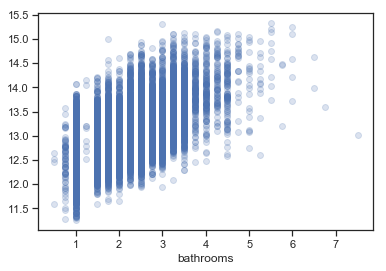

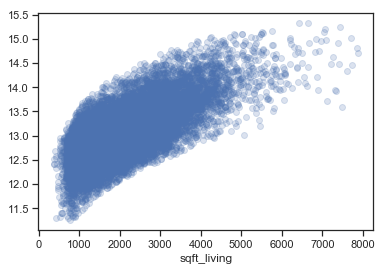

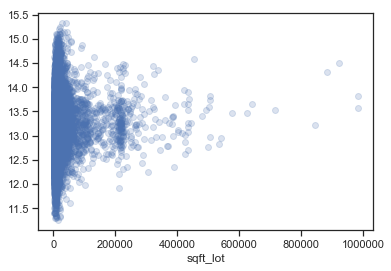

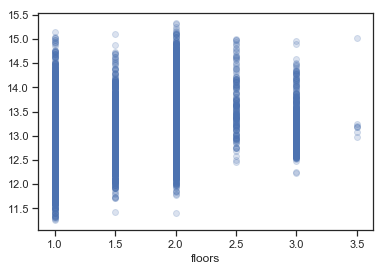

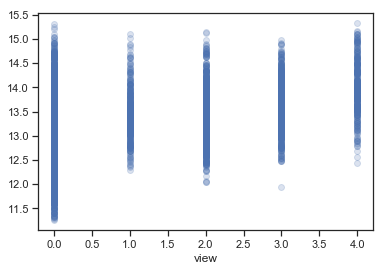

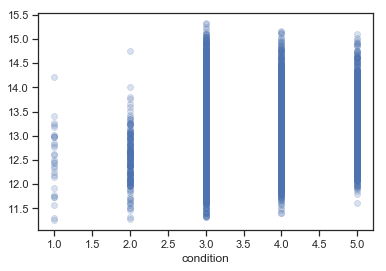

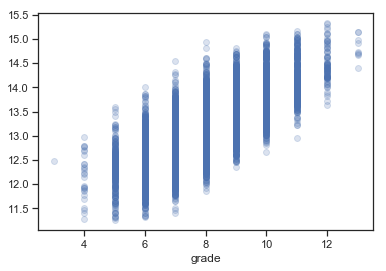

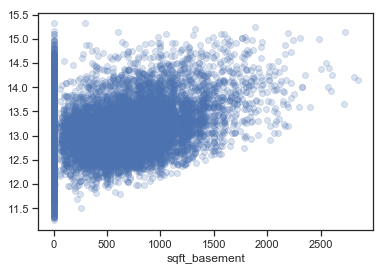

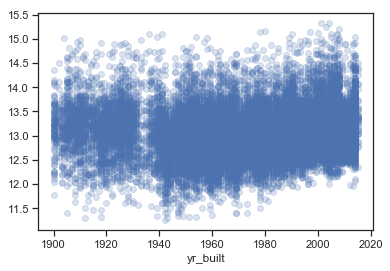

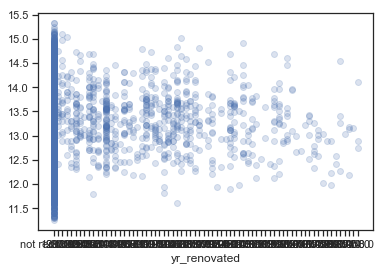

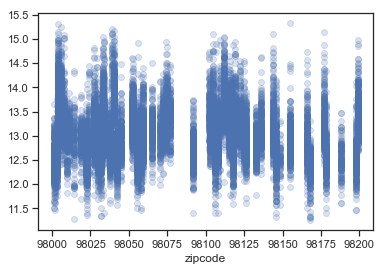

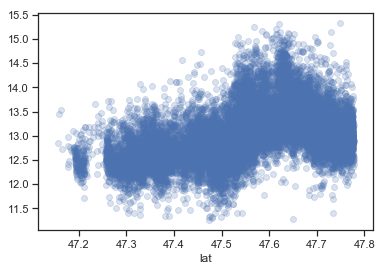

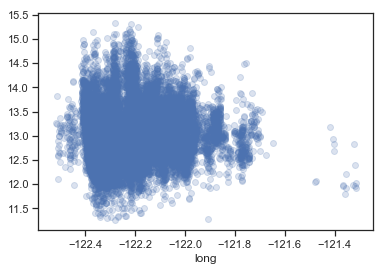

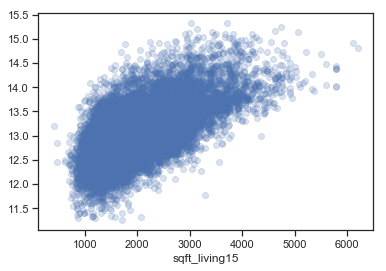

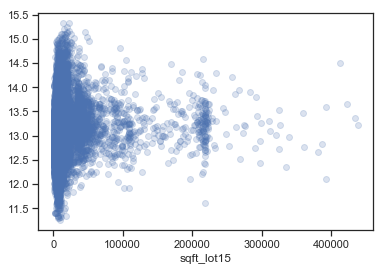

In [40]:
#TESTING ASSUMPTIONS FOR LINEAR REGRESSION

list_of_columns = list(df.columns)

for column in list_of_columns:
    plt.scatter(df[column],df.price, alpha =0.2)
    plt.xlabel(column)
    plt.show()

In [41]:
#observations
    #sqft_living does not seem very linear (exponential, perhaps?), also has some outliers
    #sqft_basement will be a categotical variable, as there are too many 0 values for properties without basement
    #the same applies for yr_renovated
    # Lat
        #northern properties have generaly bigger value than southern
        # peak between 47.55 and 47.65
    #long does not have a linear relationship, value of properties peak at -122.2 and then decrease

## Preparing categorical variables

In [42]:
#DEALING WITH CATEGORICAL VARIABLES
# bedrooms
# bathrooms
# floors
# view
# condition
# grade


for var in ['bedrooms','bathrooms','floors','view','condition','grade']:
    print (df[var].value_counts())

3     9823
4     6877
2     2759
5     1592
6      269
1      196
7       37
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64
2.50    5376
1.00    3849
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     730
3.25     587
3.75     155
4.00     135
4.50      99
4.25      78
0.75      71
4.75      23
5.00      20
5.25      12
5.50       9
1.25       9
6.00       5
0.50       4
5.75       3
6.50       2
7.50       1
6.75       1
Name: bathrooms, dtype: int64
1.0    10668
2.0     8223
1.5     1908
3.0      610
2.5      160
3.5        7
Name: floors, dtype: int64
0    19477
2      955
3      504
1      330
4      310
Name: view, dtype: int64
3    14007
4     5672
5     1699
2      169
1       29
Name: condition, dtype: int64
7     8973
8     6064
9     2615
6     2037
10    1132
11     394
5      241
12      83
4       27
13       9
3        1
Name: grade, dtype: int64


In [43]:
#columns condition, view, floors are distributed within less than 7 numbers - I will simply turn them into categories
#I will also add zipcode
df.condition = df.condition.astype('category')
df.view = df.view.astype('category')
df.floors = df.floors.astype('category')


#creating dummy columns
condition_dummies = pd.get_dummies(df.condition,prefix='cond')
view_dummies = pd.get_dummies(df.view,prefix='view')
floors_dummies = pd.get_dummies(df.floors,prefix='flo')
zipcode_dummies = pd.get_dummies(df.zipcode,prefix='zip')

#removing original columns
df = df.drop(["condition","view","floors","zipcode"], axis=1)

#adding dummy columns
df = pd.concat([df, condition_dummies, view_dummies, floors_dummies, zipcode_dummies], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21576 entries, 0 to 21596
Data columns (total 99 columns):
price            21576 non-null float64
bedrooms         21576 non-null int64
bathrooms        21576 non-null float64
sqft_living      21576 non-null int64
sqft_lot         21576 non-null int64
grade            21576 non-null int64
sqft_basement    21576 non-null float64
yr_built         21576 non-null int64
yr_renovated     21576 non-null object
lat              21576 non-null float64
long             21576 non-null float64
sqft_living15    21576 non-null int64
sqft_lot15       21576 non-null int64
cond_1           21576 non-null uint8
cond_2           21576 non-null uint8
cond_3           21576 non-null uint8
cond_4           21576 non-null uint8
cond_5           21576 non-null uint8
view_0           21576 non-null uint8
view_1           21576 non-null uint8
view_2           21576 non-null uint8
view_3           21576 non-null uint8
view_4           21576 non-null uint8
flo_1.

In [44]:
#turning yr_renovated into numerical
#I am replacing the 'not renovated' values into the corresponding 'yr_built value'.
#This columns now represent the age of the house taking into consideration renovations
#The Person's correlation coefficient is now 0.93! I will drop the 'yr_built' category now.
df.yr_renovated.value_counts()
df.loc[df.yr_renovated == 'not renovated','yr_renovated'] = df['yr_built']
df.yr_renovated = df.yr_renovated.astype('float64')



In [45]:
df = df.drop('yr_built', axis = 1)

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


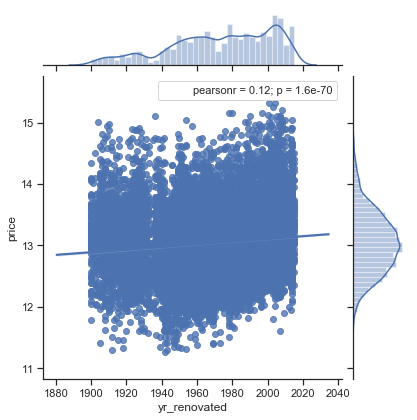

In [46]:
from scipy.stats import pearsonr
sns.jointplot(x='yr_renovated', y='price', data=df, kind = 'reg', stat_func=pearsonr)

In [47]:
df.bedrooms = df.bedrooms.astype('float64')
df.grade = df.grade.astype('float64')

bedrooms_bins = [0,2,3,4,5,11]
bathrooms_bins = [0,1,2,3,4,5,8]
grade_bins = [0,6,7,8,9,10,11,14]

yr_renovated_bins = [1900,1920,1940,1960,1980,2000,2010,2020]
sqft_basement_bins = [0,500,1000,6000]

In [48]:
# using pd.cut
bins_bedrooms = pd.cut(df['bedrooms'], bedrooms_bins)
bins_bathrooms = pd.cut(df['bathrooms'], bathrooms_bins)
bins_grade = pd.cut(df['grade'], grade_bins)


bins_yr_renovated = pd.cut(df['yr_renovated'], yr_renovated_bins)
bins_sqft_basement = pd.cut(df['sqft_basement'], sqft_basement_bins)

In [49]:
# using pd.cut returns unordered categories. Transform this to ordered categories.
bins_bedrooms = bins_bedrooms.cat.as_unordered()
bins_bathrooms = bins_bathrooms.cat.as_unordered()
bins_grade = bins_grade.cat.as_unordered()

bins_yr_renovated = bins_yr_renovated.cat.as_unordered()

bins_sqft_basement = bins_sqft_basement.cat.as_unordered()

In [50]:
# replace the existing columns
df['bedrooms']=bins_bedrooms
df['bathrooms']=bins_bathrooms
df['grade']=bins_grade


df['yr_renovated']=bins_yr_renovated

df['sqft_basement'] = bins_sqft_basement

In [51]:
#LABEL ENCODING

df['bedrooms'] = df['bedrooms'].cat.codes
df['bathrooms'] = df['bathrooms'].cat.codes
df['grade'] = df['grade'].cat.codes

df['yr_renovated'] = df['yr_renovated'].cat.codes

df['sqft_basement'] = df['sqft_basement'].cat.codes

In [52]:
#CREATING DUMMY VARIABLES

bathrooms_dummy = pd.get_dummies(df['bathrooms'], prefix="bath")
bedrooms_dummy = pd.get_dummies(df['bedrooms'], prefix="bed")
grade_dummy = pd.get_dummies(df['grade'], prefix="grade")


yr_renovated_dummy = pd.get_dummies(df['yr_renovated'], prefix="reno")

sqft_basement_dummy = pd.get_dummies(df['sqft_basement'], prefix= "base")

In [53]:
add_series = [df,bathrooms_dummy, bedrooms_dummy, grade_dummy, sqft_basement_dummy,yr_renovated_dummy]
df = pd.concat(add_series, axis=1)


In [54]:
#removing original columns
df = df.drop(["bedrooms","bathrooms","grade", "yr_renovated","sqft_basement"], axis=1)


In [55]:
#RENAMING FLOORS COLUMNS
df = df.rename(columns={'flo_1.0': 'flo10','flo_1.5': 'flo15','flo_2.0': 'flo20','flo_2.5': 'flo25','flo_3.0': 'flo30','flo_3.5': 'flo35'})
df = df.rename(columns={'base_-1':'baseminus1','base_0':'base0','base_1':'base1','base_2':'base2'})
df = df.rename(columns={'reno_-1':'renominus1','reno_0':'reno0','reno_1':'reno1','reno_2':'reno2','reno_3':'reno3','reno_4':'reno4','reno_5':'reno5','reno_6':'reno6'})
df = df.rename(columns={'bed_-1':'bedminus1'})



In [56]:
df = df.drop('cond_5',axis=1)
df = df.drop('view_4',axis=1)
df = df.drop('flo35',axis=1)
df = df.drop('bath_5',axis=1)
df = df.drop('bed_4',axis=1)
df = df.drop('grade_6',axis=1)
df = df.drop('base2',axis=1)
df = df.drop('reno6',axis=1)

# 3) Modeling Data

In [58]:
# intial run (outliers removed) 0.824, 0.823
# with outliers: 0.816, 0.815
# after removing id column: 0.826
# after removing houses above £5 mil 0.826,0.825
# after transforming target variable: 0.885, 0.885
# without creating cat variables 0.879
# without zipcodes 0.775

In [59]:
#MODEL VERSIONS

df = df.drop('long', axis =1)
df = df.drop('lat', axis = 1)
# dropping these variables imporoved the distributions of my residual errors

In [60]:

#df = df.drop('sqft_living15', axis = 1)
#df = df.drop('sqft_lot15', axis = 1)
#df = df.drop('sqft_lot', axis = 1)

## Model 1

In [61]:
from statsmodels.formula.api import ols

outcome = 'price'
predictors = df.drop('price', axis=1)

pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [62]:
model_1 = ols(formula= formula, data=df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1387.
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        12:29:42   Log-Likelihood:                 6009.1
No. Observations:               21576   AIC:                        -1.179e+04
Df Residuals:                   21464   BIC:                        -1.090e+04
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.8276      0.081    157.990      0.000      12.668      12.987
sqft_living       0.0002   3.61e-06     59.786      0.000       0.000       0.000
sqft_lot       8.596e-07   5.15e-08     16.678      0.000    7.59e-07    9.61e-07
sqft_living15  7.154e-05   3.38e-06     21.142      0.000    6.49e-05    7.82e-05
sqft_lot15     1.299e-08   7.66e-08      0.170      0.865   -1.37e-07    1.63e-07
cond_1           -0.4001      0.035    -11.543      0.000      -0.468      -0.332
cond_2           -0.2352      0.015    -15.684      0.000      -0.265      -0.206
cond_3           -0.1084      0.005    -20.842      0.000      -0.119      -0.098
cond_4           -0.0581      0.005    -11.172      0.000      -0.068      -0.048
view_0           -0.4902      0.011    -44.254      0.000      -0.512      -0.469
view_1           -0.3671      0.015    -24.920      0.000      -0.396      -0.338
view_2           -0.3764      0.012    -30.827      0.000      -0.400      -0.353
view_3           -0.2991      0.013    -22.339      0.000      -0.325      -0.273
flo10             0.1447      0.070      2.071      0.038       0.008       0.282
flo15             0.1418      0.070      2.027      0.043       0.005       0.279
flo20             0.0971      0.070      1.392      0.164      -0.040       0.234
flo25             0.1050      0.071      1.474      0.140      -0.035       0.245
flo30            -0.0083      0.070     -0.118      0.906      -0.145       0.129
zip_98001        -0.2847      0.010    -29.011      0.000      -0.304      -0.266
zip_98002        -0.3112      0.013    -23.742      0.000      -0.337      -0.286
zip_98003        -0.2639      0.011    -23.803      0.000      -0.286      -0.242
zip_98004         0.8353      0.011     78.743      0.000       0.814       0.856
zip_98005         0.4617      0.014     32.222      0.000       0.434       0.490
zip_98006         0.3448      0.009     39.813      0.000       0.328       0.362
zip_98007         0.3847      0.015     24.863      0.000       0.354       0.415
zip_98008         0.3824      0.011     34.536      0.000       0.361       0.404
zip_98010        -0.0413      0.018     -2.246      0.025      -0.077      -0.005
zip_98011         0.1659      0.013     12.561      0.000       0.140       0.192
zip_98014         0.0164      0.017      0.970      0.332      -0.017       0.050
zip_98019         0.0313      0.013      2.325      0.020       0.005       0.058
zip_98022        -0.2589      0.012    -20.858      0.000      -0.283      -0.235
zip_98023        -0.3067      0.008    -36.156      0.000      -0.323      -0.290
zip_98024         0.1258      0.021      6.073      0.000       0.085       0.166
zip_98027         0.2221      0.009     23.949      0.000       0.204       0.240
zip_98028         0.1317      0.011     11.989   

In [63]:
# this model has a high R-squared and good validation results, as shown below
# the problem of this model are its residual errors distribution

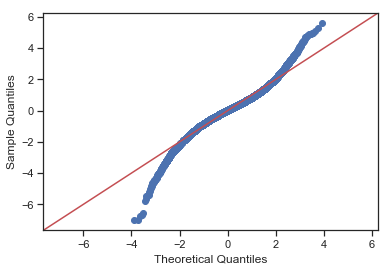

In [64]:
# Normality assumption
# the normality assumption talks about the model residuals and not about the distributions of the variables

residuals = model_1.resid
residuals_plot = sm.graphics.qqplot(residuals, dist=stats.norm, line ='45', fit=True)



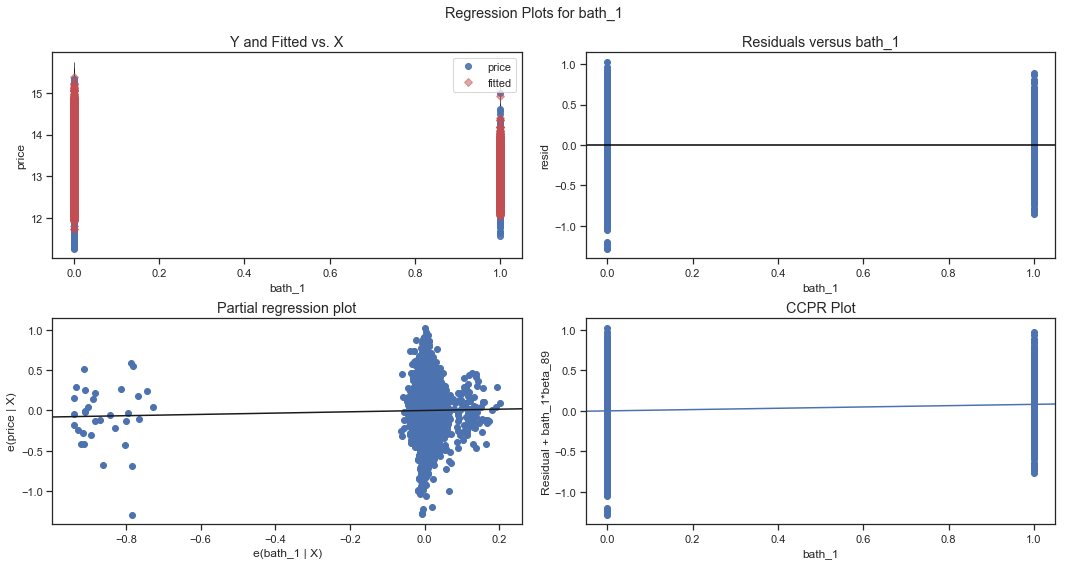

In [65]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, 'bath_1', fig=fig)
plt.show()



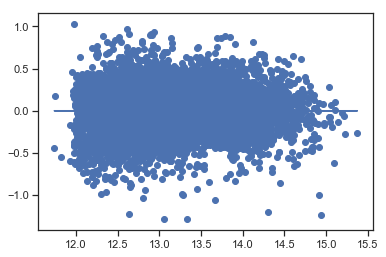

In [66]:
x_cols = df.columns
plt.scatter(model_1.predict(df[x_cols]), model_1.resid)
plt.plot(model_1.predict(df[x_cols]), [0 for i in range(len(df))])


## Model 2

In [67]:
#For my second model I will dry dropping the zipcode categories to improve the residuals of model 1

zipcode_cat = df.columns[18:90]
df_2 = df.drop(zipcode_cat, axis=1)

In [68]:
from statsmodels.formula.api import ols

outcome = 'price'
predictors = df_2.drop('price', axis=1)

pred_sum = "+".join(predictors.columns)
formula_2 = outcome + "~" + pred_sum

In [69]:
model_2 = ols(formula=formula_2, data=df_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     1007.
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        12:29:56   Log-Likelihood:                -5284.8
No. Observations:               21576   AIC:                         1.065e+04
Df Residuals:                   21535   BIC:                         1.098e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.7510      0.127    107.942      0.000      13.501      14.001
sqft_living       0.0002   5.84e-06     28.298      0.000       0.000       0.000
sqft_lot       3.284e-07   8.61e-08      3.813      0.000     1.6e-07    4.97e-07
sqft_living15     0.0001   5.31e-06     20.733      0.000    9.97e-05       0.000
sqft_lot15    -4.596e-07   1.25e-07     -3.684      0.000   -7.04e-07   -2.15e-07
cond_1           -0.3455      0.058     -5.934      0.000      -0.460      -0.231
cond_2           -0.2892      0.025    -11.499      0.000      -0.339      -0.240
cond_3           -0.1219      0.009    -14.231      0.000      -0.139      -0.105
cond_4           -0.0724      0.009     -8.325      0.000      -0.089      -0.055
view_0           -0.3986      0.018    -21.761      0.000      -0.435      -0.363
view_1           -0.2430      0.025     -9.853      0.000      -0.291      -0.195
view_2           -0.3128      0.020    -15.320      0.000      -0.353      -0.273
view_3           -0.2740      0.022    -12.216      0.000      -0.318      -0.230
flo10            -0.2025      0.117     -1.725      0.085      -0.433       0.028
flo15            -0.1345      0.118     -1.143      0.253      -0.365       0.096
flo20            -0.1813      0.117     -1.546      0.122      -0.411       0.049
flo25            -0.1019      0.120     -0.851      0.395      -0.337       0.133
flo30            -0.0036      0.118     -0.031      0.976      -0.234       0.227
bath_2            0.0154      0.007      2.360      0.018       0.003       0.028
bath_3            0.0801      0.012      6.957      0.000       0.058       0.103
bath_4            0.0907      0.024      3.740      0.000       0.043       0.138
bed_0             0.0746      0.020      3.748      0.000       0.036       0.114
bed_1             0.0236      0.019      1.270      0.204      -0.013       0.060
bed_2             0.0058      0.018      0.321      0.748      -0.030       0.042
bed_3             0.0011      0.019      0.057      0.955      -0.036       0.038
grade_0          -1.0452      0.038    -27.464      0.000      -1.120      -0.971
grade_1          -0.7466      0.037    -20.283      0.000      -0.819      -0.674
grade_2          -0.5418      0.036    -15.039      0.000      -0.612      -0.471
grade_3          -0.3506      0.035     -9.958      0.000      -0.420      -0.282
grade_4          -0.2084      0.035     -5.980      0.000      -0.277      -0.140
grade_5          -0.1190      0.036     -3.284      0.001      -0.190      -0.048
baseminus1       -0.0661      0.010     -6.611      0.000      -0.086      -0.047
base0             0.0334      0.011      2.950      0.003       0.011       0.056
base1             0.0198      0.010      2.073      0.038       0.001       0.038
renominus1        0.3862      0.038     10.222   

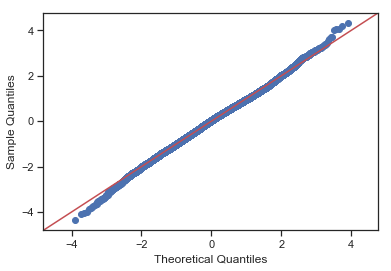

In [70]:
residuals = model_2.resid
residuals_plot = sm.graphics.qqplot(residuals, dist=stats.norm, line ='45', fit=True)

#this model has greatly improved the residuals, but it's R-squared is now much lower

## Model 3

In [71]:
# For my third model I will go back to model one, but I will remove variables with inflated coefficients
# This model will include the zipcode information again

In [72]:
df_3 = df
#df_3 = df_3.drop('sqft_living15', axis = 1)
df_3 = df_3.drop('sqft_lot15', axis = 1)
df_3 = df_3.drop('sqft_lot', axis = 1)

In [73]:
from statsmodels.formula.api import ols

outcome = 'price'
predictors = df_3.drop('price', axis=1)

pred_sum = "+".join(predictors.columns)
formula_3 = outcome + "~" + pred_sum

In [74]:
model_3 = ols(formula= formula_3, data=df_3).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     1356.
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        12:29:58   Log-Likelihood:                 5535.9
No. Observations:               21576   AIC:                        -1.085e+04
Df Residuals:                   21467   BIC:                            -9984.
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.8678      0.083    155.178      0.000      12.705      13.030
sqft_living     0.0003   3.44e-06     73.345      0.000       0.000       0.000
cond_1         -0.3620      0.035    -10.225      0.000      -0.431      -0.293
cond_2         -0.2203      0.015    -14.383      0.000      -0.250      -0.190
cond_3         -0.1020      0.005    -19.209      0.000      -0.112      -0.092
cond_4         -0.0540      0.005    -10.157      0.000      -0.064      -0.044
view_0         -0.5082      0.011    -45.077      0.000      -0.530      -0.486
view_1         -0.3703      0.015    -24.592      0.000      -0.400      -0.341
view_2         -0.3774      0.012    -30.247      0.000      -0.402      -0.353
view_3         -0.2898      0.014    -21.187      0.000      -0.317      -0.263
flo10           0.1748      0.071      2.448      0.014       0.035       0.315
flo15           0.1700      0.071      2.378      0.017       0.030       0.310
flo20           0.1177      0.071      1.651      0.099      -0.022       0.257
flo25           0.1135      0.073      1.560      0.119      -0.029       0.256
flo30           0.0059      0.072      0.083      0.934      -0.134       0.146
zip_98001      -0.2855      0.010    -28.467      0.000      -0.305      -0.266
zip_98002      -0.3288      0.013    -24.570      0.000      -0.355      -0.303
zip_98003      -0.2711      0.011    -23.939      0.000      -0.293      -0.249
zip_98004       0.8432      0.011     78.143      0.000       0.822       0.864
zip_98005       0.4771      0.015     32.654      0.000       0.448       0.506
zip_98006       0.3588      0.009     41.011      0.000       0.342       0.376
zip_98007       0.3844      0.016     24.327      0.000       0.353       0.415
zip_98008       0.3761      0.011     33.252      0.000       0.354       0.398
zip_98010      -0.0053      0.019     -0.281      0.779      -0.042       0.031
zip_98011       0.1753      0.013     13.009      0.000       0.149       0.202
zip_98014       0.0629      0.017      3.686      0.000       0.029       0.096
zip_98019       0.0633      0.014      4.615      0.000       0.036       0.090
zip_98022      -0.2216      0.013    -17.695      0.000      -0.246      -0.197
zip_98023      -0.3096      0.009    -35.744      0.000      -0.327      -0.293
zip_98024       0.1993      0.021      9.552      0.000       0.158       0.240
zip_98027       0.2464      0.009     26.128      0.000       0.228       0.265
zip_98028       0.1354      0.011     12.067      0.000       0.113       0.157
zip_98029       0.2968      0.011     27.693      0.000       0.276       0.318
zip_98030      -0.2385      0.012    -20.170      0.000      -0.262      -0.215
zip_98031      -0.2115      0.012    -18.394      0.000      -0.234      -0.189
zip_98032      -0.3214      0.017    -19.22

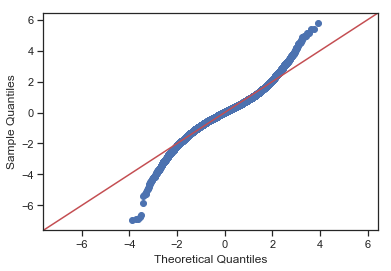

In [84]:
residuals = model_3.resid
residuals_plot = sm.graphics.qqplot(residuals, dist=stats.norm, line ='45', fit=True)

# 4) Model Validation

In [75]:
# When using a train test split, we'll compare your residuals for both test set and training set
# A big difference in value between the test and training set (R)MSE is an indication of overfitting

## train-test-split with Scikit-learn

In [85]:
y = df_3[["price"]]
X = df_3.drop(["price"], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(len(X_train), len(X_test), len(y_train), len(y_test))

17260 4316 17260 4316


In [86]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

#linreg.predict will create a new variable y_hat with contains the predicted house prices based on our 
#training and testing models

In [87]:
# this equation takes in the the differences between the predicted and the original value**2,
# divides them by the number of observations and sums them up = MSE
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('TRAIN Mean Squarred Error:', mse_train)
print('TEST Mean Squarred Error:', mse_test)

TRAIN Mean Squarred Error: price    0.034648
dtype: float64
TEST Mean Squarred Error: price    0.036899
dtype: float64


In [88]:
print('Difference between train and test MSE:', mse_test-mse_train)

Difference between train and test MSE: price    0.002251
dtype: float64


## cross-validation

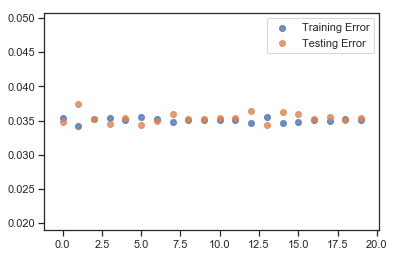

In [89]:
#The code below repeats a train-test-split creation n times
# each time a new random train-test-split is created

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
import matplotlib.pyplot as plt

num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error', alpha = 0.8)
plt.scatter(list(range(num)), test_err, label='Testing Error', alpha = 0.8)
plt.legend();

## K-fold cross validation

In [90]:
# I will now perform the K-fold cross validation, which takes in combinations of testing and training data
# across entire dataset. This way we test all data against its remaining data.
# Cross-validation MSE = average of individual results

from sklearn.model_selection import cross_val_score

cross_val_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))


In [91]:
k_fold_result = abs(cross_val_results)

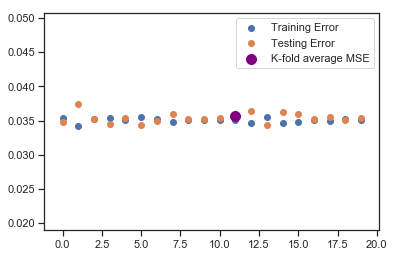

In [92]:
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.scatter(11,k_fold_result,color='purple', label = 'K-fold average MSE',s=100)
plt.legend();                                   
